## Customer Churn Classification

#### Importing Libraries

In [1]:
import pandas as pd # importing pandas library for data manipulation and analysis
import numpy as np # importing numpy library for numerical operations
import matplotlib.pyplot as plt # importing matplotlib for data visualization
import seaborn as sns # importing seaborn for statistical data visualization
from sklearn.model_selection import train_test_split # importing train_test_split for splitting data into training and testing sets
from sklearn.ensemble import RandomForestClassifier # importing RandomForestClassifier for classification tasks
from xgboost import XGBClassifier # importing XGBClassifier for classification tasks 
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report # importing metrics for model evaluation

#### Data collecting 

In [2]:
# Loading the customer churn dataset from a CSV file
customer_churn = pd.read_csv(r"D:\Additional-projects\customer_churn\customer_churn_dataset.csv")

In [3]:
# Displaying the first few rows of the dataset
customer_churn.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes


In [4]:
# Displaying the structure and summary of the dataset
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20100 non-null  int64  
 1   tenure            20100 non-null  int64  
 2   monthly_charges   20100 non-null  float64
 3   total_charges     20100 non-null  float64
 4   contract          20100 non-null  object 
 5   payment_method    20100 non-null  object 
 6   internet_service  18087 non-null  object 
 7   tech_support      20100 non-null  object 
 8   online_security   20100 non-null  object 
 9   support_calls     20100 non-null  int64  
 10  churn             20100 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


In [5]:
# Checking for missing values in the dataset
customer_churn.isnull().sum()

customer_id            0
tenure                 0
monthly_charges        0
total_charges          0
contract               0
payment_method         0
internet_service    2013
tech_support           0
online_security        0
support_calls          0
churn                  0
dtype: int64

In [6]:
customer_churn['internet_service'].value_counts()

internet_service
Fiber    10121
DSL       7966
Name: count, dtype: int64

In [7]:
# null values in internet service column are filled with using mode
customer_churn['internet_service'].fillna(customer_churn['internet_service'].mode()[0], inplace=True)

C:\Users\hb292\AppData\Local\Temp\ipykernel_25708\1617281871.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_churn['internet_service'].fillna(customer_churn['internet_service'].mode()[0], inplace=True)


In [8]:
# checking again for missing values after filling missing data
customer_churn.isnull().sum()

customer_id         0
tenure              0
monthly_charges     0
total_charges       0
contract            0
payment_method      0
internet_service    0
tech_support        0
online_security     0
support_calls       0
churn               0
dtype: int64

In [9]:
customer_churn.describe()

,customer_id,tenure,monthly_charges,total_charges,support_calls
count,20100.000000,20100.000000,20100.000000,20100.000000,20100.000000
mean,10050.500000,36.476219,70.001454,2543.276302,1.514527
std,5802.514541,20.788458,28.841080,1881.448425,1.239650
min,1.000000,1.000000,20.000000,20.230000,0.000000
25%,5025.750000,18.000000,45.310000,1045.780000,1.000000
50%,10050.500000,36.000000,70.010000,2097.205000,1.000000
75%,15075.250000,54.000000,95.002500,3691.670000,2.000000
max,20100.000000,72.000000,120.000000,8629.920000,8.000000


## Data Analysis

### Categorical data
- contract         
- payment_method    
- internet_service  
- tech_support      
- online_security

<Axes: xlabel='contract', ylabel='count'>

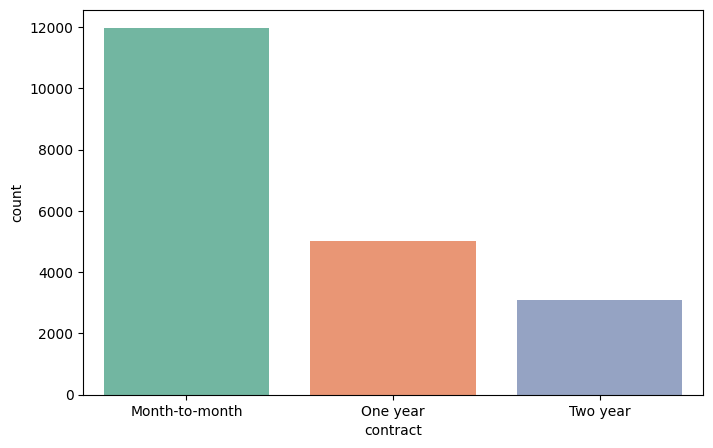

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='contract', data=customer_churn, hue='contract', palette='Set2')

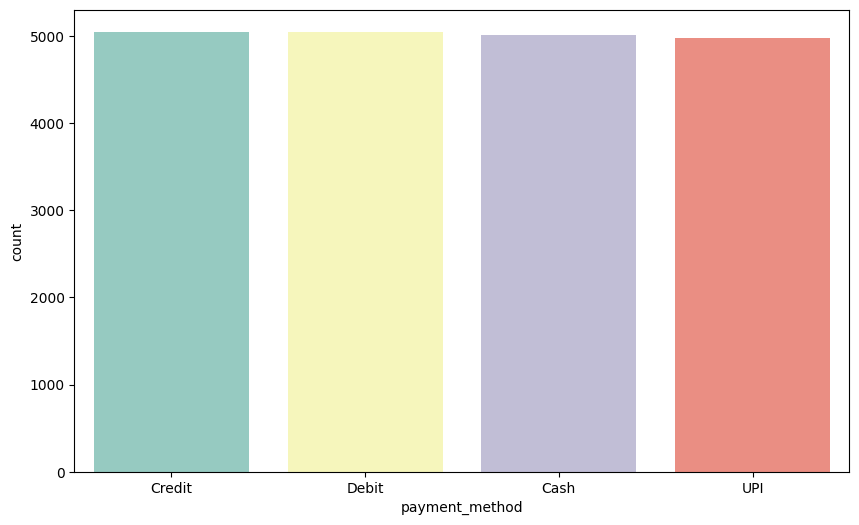

In [11]:
plt.figure(figsize=(10,6)) 
sns.countplot(x='payment_method', data=customer_churn , hue='payment_method', palette='Set3')
plt.show()

In [12]:
# Displaying the counts of different payment methods
customer_churn['payment_method'].value_counts()

payment_method
Credit    5054
Debit     5047
Cash      5018
UPI       4981
Name: count, dtype: int64

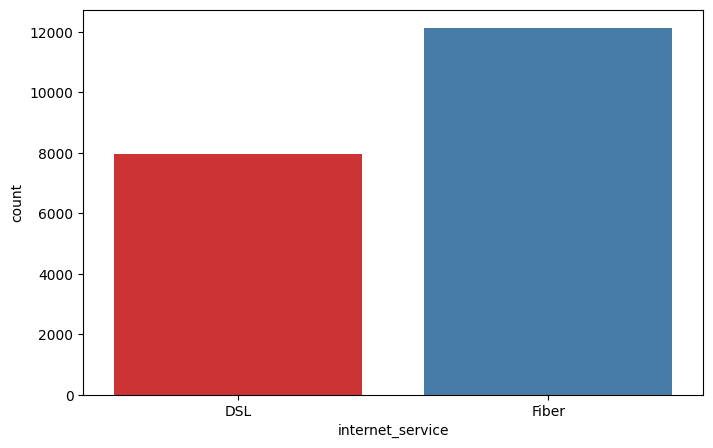

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='internet_service', data=customer_churn, hue='internet_service', palette='Set1')
plt.show()

In [14]:
# checking again for values count
customer_churn['internet_service'].value_counts()

internet_service
Fiber    12134
DSL       7966
Name: count, dtype: int64

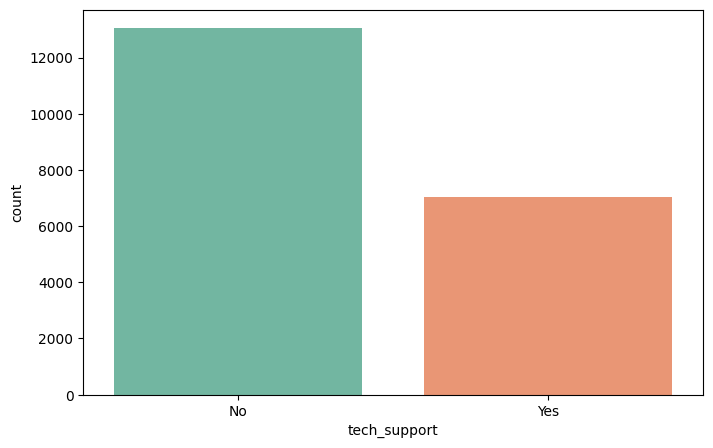

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='tech_support', data=customer_churn, hue='tech_support', palette='Set2')
plt.show()

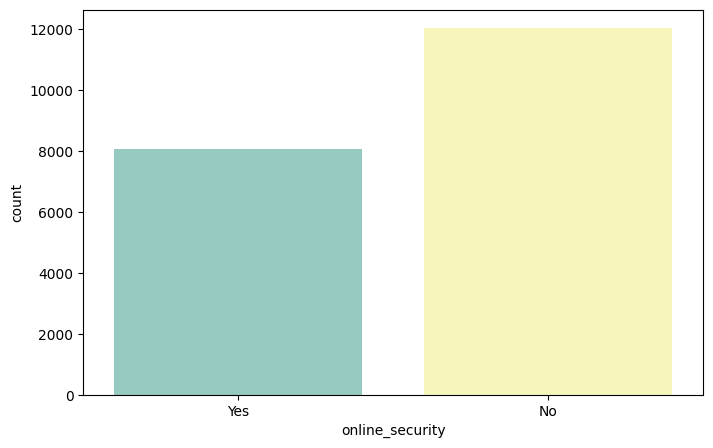

In [16]:
plt.figure(figsize=(8,5))  
sns.countplot(x='online_security', data=customer_churn, hue='online_security', palette='Set3')
plt.show()

#### Numerical Data

<Figure size 800x800 with 0 Axes>

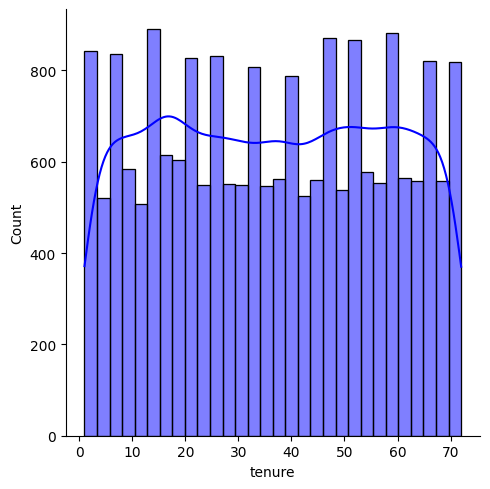

In [17]:
# plotting the distribution of tenure feature
plt.figure(figsize=(8,8))
sns.displot(customer_churn['tenure'], bins=30, kde=True, color='blue')

In [18]:
customer_churn['tenure'].unique()

array([52, 15, 72, 61, 21, 24,  3, 22, 53,  2, 30, 38, 64, 60, 33, 58, 49,
       59, 42, 62, 47, 51, 55,  7, 39, 18,  4, 14,  9, 71, 44,  8, 35, 36,
       50,  6, 54, 63, 34, 48, 40, 26, 41, 29, 45, 65,  1, 11,  5, 28, 12,
       23, 37, 27, 43, 13, 32, 66, 57, 70, 56, 19, 68, 17, 69, 16, 20, 67,
       31, 25, 46, 10])

<Figure size 800x1200 with 0 Axes>

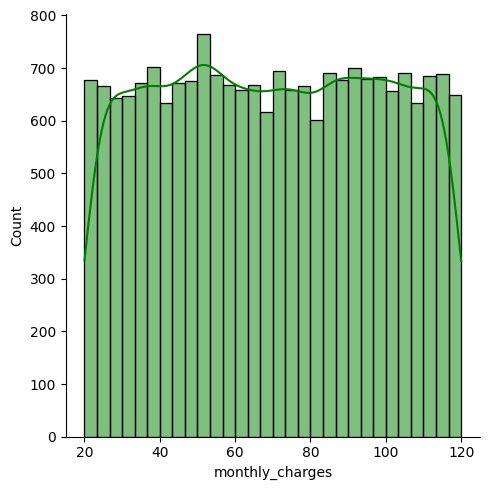

In [19]:
# plotting the distribution of the monthly_charges feature
plt.figure(figsize=(8,12))
sns.displot(customer_churn['monthly_charges'], bins=30, kde=True, color='green')

<Figure size 800x1200 with 0 Axes>

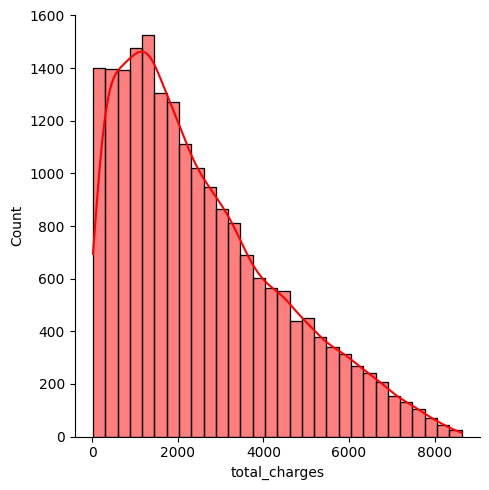

In [20]:
# plotting the distribution of the total_charges feature
plt.figure(figsize=(8,12))
sns.displot(customer_churn['total_charges'], bins=30, kde=True, color='red')

<Figure size 800x800 with 0 Axes>

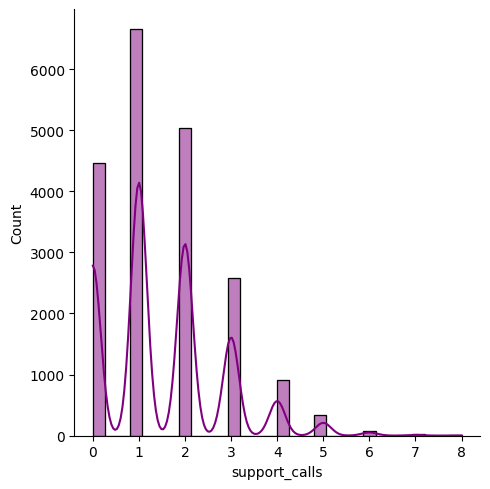

In [21]:
# plotting the distribution of the support_calls feature
plt.figure(figsize=(8,8))
sns.displot(customer_churn['support_calls'], bins=30, kde=True, color='purple')

In [22]:
customer_churn['support_calls'].value_counts()

support_calls
1    6654
2    5045
0    4471
3    2585
4     908
5     335
6      81
7      18
8       3
Name: count, dtype: int64

#### Checking if the features are:
- Positive Correlated
- negative correlated

C:\Users\hb292\AppData\Local\Temp\ipykernel_25708\2752387425.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tenure', y ='churn',data=customer_churn , palette='Set2')


<Axes: xlabel='tenure', ylabel='churn'>

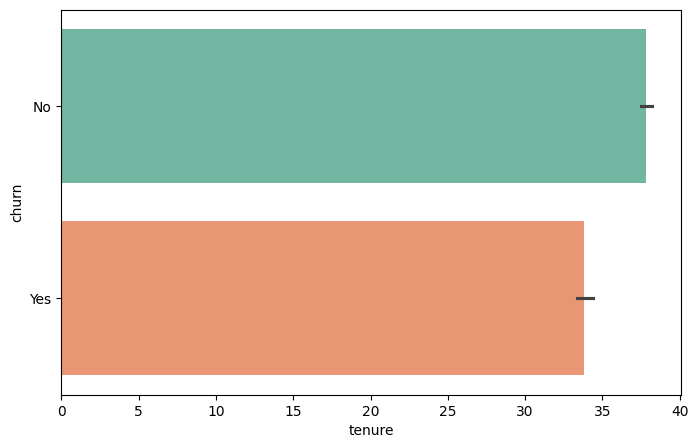

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x='tenure', y ='churn',data=customer_churn , palette='Set2')

C:\Users\hb292\AppData\Local\Temp\ipykernel_25708\2494659875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='monthly_charges', y ='churn',data=customer_churn , palette='Set3')


<Axes: xlabel='monthly_charges', ylabel='churn'>

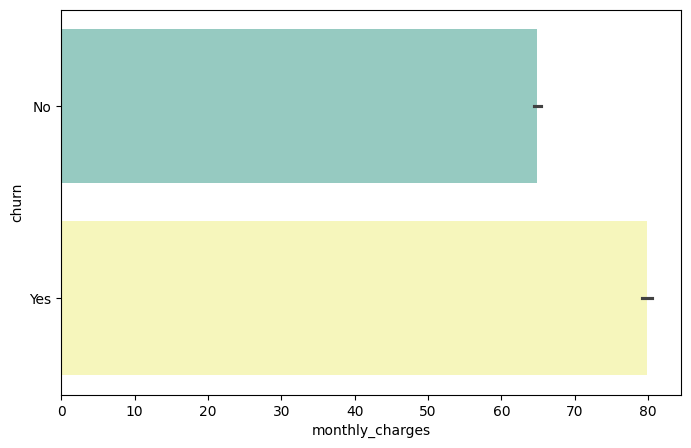

In [24]:
# monthly_charges
plt.figure(figsize=(8,5))
sns.barplot(x='monthly_charges', y ='churn',data=customer_churn , palette='Set3')

C:\Users\hb292\AppData\Local\Temp\ipykernel_25708\197987527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_charges', y ='churn',data=customer_churn , palette='Set1')


<Axes: xlabel='total_charges', ylabel='churn'>

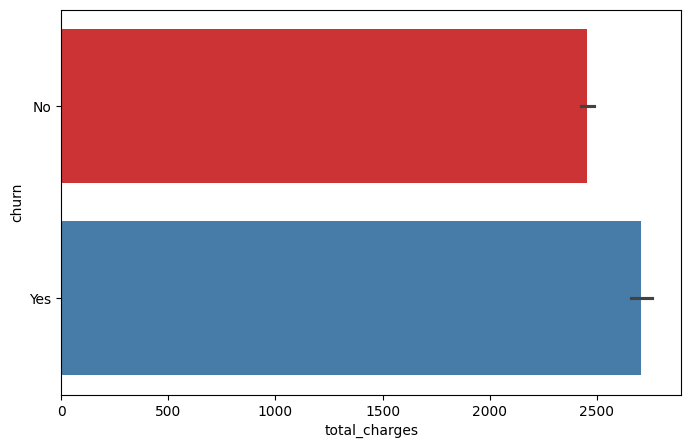

In [25]:
# total_charges
plt.figure(figsize=(8,5))
sns.barplot(x='total_charges', y ='churn',data=customer_churn , palette='Set1')

<Axes: xlabel='support_calls', ylabel='churn'>

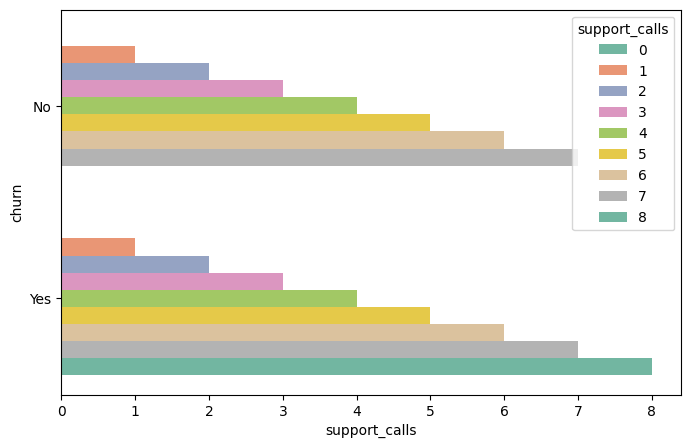

In [26]:
# contract
plt.figure(figsize=(8,5))
sns.barplot(x='support_calls', y ='churn',data=customer_churn , palette='Set2' , hue='support_calls')

### ENCODING

In [27]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20100 non-null  int64  
 1   tenure            20100 non-null  int64  
 2   monthly_charges   20100 non-null  float64
 3   total_charges     20100 non-null  float64
 4   contract          20100 non-null  object 
 5   payment_method    20100 non-null  object 
 6   internet_service  20100 non-null  object 
 7   tech_support      20100 non-null  object 
 8   online_security   20100 non-null  object 
 9   support_calls     20100 non-null  int64  
 10  churn             20100 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


In [28]:
customer_churn['total_charges'] = customer_churn['total_charges'].round().astype('int64')

In [29]:
customer_churn['monthly_charges'] = customer_churn['monthly_charges'].round().astype('int64')

In [30]:
customer_churn

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54,2818,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35,529,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78,5633,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80,4895,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39,827,Month-to-month,UPI,Fiber,No,No,4,Yes
...,...,...,...,...,...,...,...,...,...,...,...
20095,20096,66,68,4521,Two year,Cash,Fiber,Yes,Yes,0,No
20096,20097,42,61,2566,One year,UPI,DSL,Yes,Yes,1,No
20097,20098,30,54,1614,One year,Debit,DSL,Yes,Yes,2,No
20098,20099,72,73,5285,Two year,Credit,Fiber,Yes,Yes,0,No


In [31]:
customer_churn['contract'] = customer_churn['contract'].map({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}).astype('int64')

In [32]:
customer_churn

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54,2818,0,Credit,DSL,No,Yes,1,No
1,2,15,35,529,0,Debit,DSL,No,No,2,No
2,3,72,78,5633,0,Debit,DSL,No,No,0,No
3,4,61,80,4895,1,Cash,Fiber,Yes,Yes,0,No
4,5,21,39,827,0,UPI,Fiber,No,No,4,Yes
...,...,...,...,...,...,...,...,...,...,...,...
20095,20096,66,68,4521,2,Cash,Fiber,Yes,Yes,0,No
20096,20097,42,61,2566,1,UPI,DSL,Yes,Yes,1,No
20097,20098,30,54,1614,1,Debit,DSL,Yes,Yes,2,No
20098,20099,72,73,5285,2,Credit,Fiber,Yes,Yes,0,No


In [33]:
customer_churn['contract'].value_counts()

contract
0    11967
1     5027
2     3106
Name: count, dtype: int64

In [34]:
customer_churn['payment_method'].unique()

array(['Credit', 'Debit', 'Cash', 'UPI'], dtype=object)

In [35]:
customer_churn['payment_method'] = customer_churn['payment_method'].map({
    'Credit': 0,
    'Debit': 1,
    'Cash' : 2,
    'UPI' : 3
}).astype('int64')

In [36]:
customer_churn['internet_service'].unique()

array(['DSL', 'Fiber'], dtype=object)

In [37]:
customer_churn['internet_service'] = customer_churn['internet_service'].map({
    'DSL': 0,
    'Fiber': 1,
}).astype('int64')

In [38]:
customer_churn['internet_service'].value_counts()

internet_service
1    12134
0     7966
Name: count, dtype: int64

In [39]:
customer_churn['tech_support'] = customer_churn['tech_support'].map({
    'Yes': 1,
    'No': 0
}).astype('int64')

In [40]:
customer_churn['online_security'] = customer_churn['online_security'].map({
    'Yes': 1,
    'No': 0
}).astype('int64')

In [41]:
customer_churn['churn'] = customer_churn['churn'].map({
    'Yes': 1,
    'No': 0
}).astype('int64')

#### for Support calls feature 

In [42]:
customer_churn['support_calls'] = customer_churn['support_calls'].apply(lambda y_value:1 if y_value>=4 else 0)

in this the number of support calls are higher we will give them 0 and when the number of support calls are lower than 4 we'll give 1

In [43]:
customer_churn['support_calls'].value_counts()

support_calls
0    18755
1     1345
Name: count, dtype: int64

In [44]:
customer_churn

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54,2818,0,0,0,0,1,0,0
1,2,15,35,529,0,1,0,0,0,0,0
2,3,72,78,5633,0,1,0,0,0,0,0
3,4,61,80,4895,1,2,1,1,1,0,0
4,5,21,39,827,0,3,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
20095,20096,66,68,4521,2,2,1,1,1,0,0
20096,20097,42,61,2566,1,3,0,1,1,0,0
20097,20098,30,54,1614,1,1,0,1,1,0,0
20098,20099,72,73,5285,2,0,1,1,1,0,0


### Spliting Features & Target

In [45]:
X = customer_churn.drop('churn', axis=1)
y = customer_churn['churn']

In [46]:
X 

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls
0,1,52,54,2818,0,0,0,0,1,0
1,2,15,35,529,0,1,0,0,0,0
2,3,72,78,5633,0,1,0,0,0,0
3,4,61,80,4895,1,2,1,1,1,0
4,5,21,39,827,0,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
20095,20096,66,68,4521,2,2,1,1,1,0
20096,20097,42,61,2566,1,3,0,1,1,0
20097,20098,30,54,1614,1,1,0,1,1,0
20098,20099,72,73,5285,2,0,1,1,1,0


In [47]:
y

0        0
1        0
2        0
3        0
4        1
        ..
20095    0
20096    0
20097    0
20098    0
20099    0
Name: churn, Length: 20100, dtype: int64

#### Spliting the data into training data and testing data

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
print(X.shape,X_train.shape, X_test.shape)

(20100, 10) (16080, 10) (4020, 10)


### Model Training

- Randomforestclassifier
- Xgboostclassifier

In [50]:
rf = RandomForestClassifier()

In [51]:
xg = XGBClassifier()

In [52]:
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [53]:
xg.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

### Evaluation

In [54]:
y_pred_rf = rf.predict(X_test)

In [55]:
y_pred_xg = xg.predict(X_test)

## confusion matrix and classification report for Random Forest Classifier

In [56]:
print("Random Forest Classifier:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier:
Confusion Matrix:
[[2490  157]
 [ 639  734]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2647
           1       0.82      0.53      0.65      1373

    accuracy                           0.80      4020
   macro avg       0.81      0.74      0.76      4020
weighted avg       0.81      0.80      0.79      4020



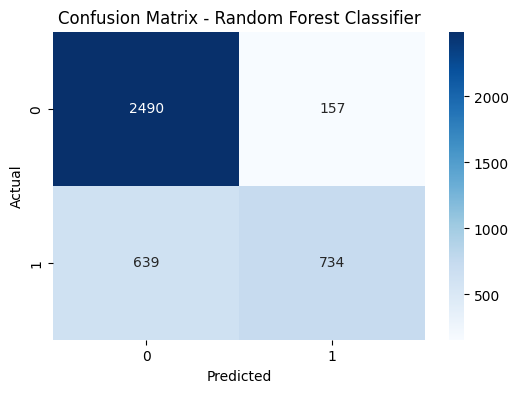

In [57]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [58]:
accuracy = accuracy_score(y_pred_rf,y_test)
print("Accuracy score",accuracy)

Accuracy score 0.8019900497512438


## confusion matrix and classification report for xgboost Classifier


In [59]:
# confusion matrix and classification report for xgboost Classifier
print("XGBoost Classifier:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xg))

XGBoost Classifier:
Confusion Matrix:
[[2481  166]
 [ 636  737]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2647
           1       0.82      0.54      0.65      1373

    accuracy                           0.80      4020
   macro avg       0.81      0.74      0.75      4020
weighted avg       0.80      0.80      0.79      4020



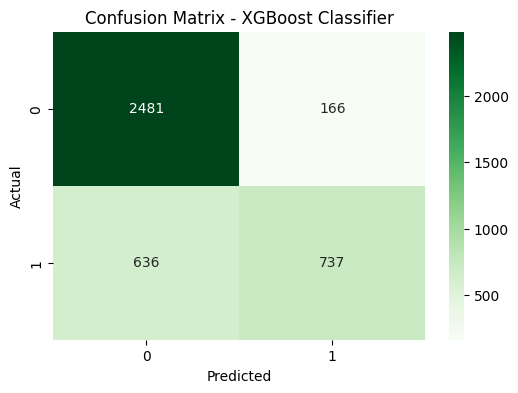

In [60]:
# plot confusion matrix for xgboost Classifier
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xg), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [61]:
accuracy = accuracy_score(y_pred_xg,y_test)
print("Accuracy score",accuracy)

Accuracy score 0.800497512437811
